<h2>FIN5615 Project #4
    <p class="text-primary">Black Scholes Options Pricing (Part I)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    The goal of this project is to build an options pricing calculator using the Black-Scholes pricing model. Our calculator will be able to price both put and call options as well as the following set of Greeks: delta, gamma, theta, vega, and rho. 
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a call option is: 
    <br><br>
    $$Call = S_0N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <br>Write an expression that can calculate the price of a call option using the Black-Scholes formula, given the follwowing variables:
    <ul>
        <li><code>stock_price</code> = price of underlying stock at time t</li>
        <li><code>strike</code> = strike price of the options contract</li>
        <li><code>term</code> = remaining time in years left on the option contract</li>
        <li><code>rf</code> = annual risk-free rate</li>
        <li><code>volatility</code> = annualized volatility of the underlying stock</li>
    </ul>
    To check your code, a 6-month call option for a stock priced at \$30, with a strike price of \$35 and volatility of 0.2 and risk-free rate of 1%, should return approximately \$0.3423. 
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
</div>

#### Q.No.1 Write an expression that can calculate the price of a call option using the Black-Scholes formula. To check your code, a 6-month call                option for a stock priced at 30, with a strike price of 35 and volatility of 0.2 and risk-free rate of 1%, should return approximately                0.3423.
### Answer

In [44]:
# Input Parameters
stock_price = 30
strike = 35     
term = 0.5
rf = .01
volatility = .2

# Calculate d1 and d2
d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + 0.5 * volatility ** 2) * term)
d2 = d1 - volatility * np.sqrt(term)

# Expression that can calculate the price of call option using the Black-scholes formula
call_price = stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)

# Checking my code 
print(f'Hence, The price of call option using the Black-Scholes formula is approximately ${call_price:.4f}.')

Hence, The price of call option using the Black-Scholes formula is approximately $0.3423.


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Write a function called <code>black_sholes_formula</code> that takes in <code>stock_price</code>, <code>strike</code>, <code>term</code>, <code>rf</code>, and <code>volatility</code> as input parameters, and outputs the price of a call option according to the Black-Scholes pricing model.
    <br><br>Double check that the function outputs the same price as the previous task under the following values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    </div>
</div>

#### Q.No.2 Write a function called black_sholes_formula that takes in stock_price, strike, term, rf, and volatility as input parameters, and outputs the price of a call option according to the Black-Scholes pricing model.
#### Answer

In [48]:

# Function that calculate call option using black_sholes_formula that takes in stock_price, strike, term, rf, and volatility as input parameters,
def black_scholes_formula(stock_price, strike, term, rf, volatility):
     
    # Calculate d1 and d2
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + 0.5 * volatility ** 2) * term)
    d2 = d1 - volatility * np.sqrt(term)
    
    # Calculate the call option price using the Black-Scholes formula
    call_price =  stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)
    
    return call_price

# Given values,
stock_price = 30       
strike = 35            
term = 0.5             #  6 months = 0.5 years
rf = 0.01              # risk-free rate
volatility = 0.2       # sigma

# Function Output
Call_Price = black_scholes_formula(stock_price, strike, term, rf, volatility)
print (f'Call_Price : ${Call_Price:.4f}')
if Call_Price == call_price:
    print ('Double Check : Function outputs same price as the previous task.')
else:
    print ('There is an error.')

Call_Price : $0.3423
Double Check : Function outputs same price as the previous task.


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a put option is:
    <br><br>
    $$Put = Ke^{-rT}N(-d_2) - S_0N(-d_1)$$
    <br>Modify the function <code>black_sholes_formula</code> by adding an extra input parameter <code>option</code> that can take on either the value <code>'call'</code> or <code>'put'</code>. Depending on the value assigned to the parameter <code>option</code>, <code>black_sholes_formula</code> will output either the price of a call or a put option.
    <br><br>Use the updated <code>black_sholes_formula</code> function to calculate the price of both a <b>call</b> and <b>put</b> option using the following input values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    The value of the call option should be approximately \$0.3423 and the value of the put option should be approximately $5.1677. Briefly explain why the put option is valued much higher than the call option under the above input values.    
    </div>
</div>

### Q.No.3.1 Modify the function black_sholes_formula by adding an extra input parameter option that can take on either the value 'call' or 'put'. Depending on the value assigned to the parameter option, black_sholes_formula will output either the price of a call or a put option.
### Answer

In [52]:
# Modification in function by adding new parameter 'option'
def updated_black_scholes_formula(stock_price, strike, term, rf, volatility, option):
   
    # Calculate d1 and d2
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + 0.5 * volatility ** 2) * term)
    d2 = d1 - volatility * np.sqrt(term)
    
    if option == "call":
        return stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)          # Call option price

    elif option == "put":
       return strike * np.exp(-rf * term) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)         # Put option price
   
    else:
       print (" Error: Option type must be 'call' or 'put'")

# Given values
stock_price = 30
strike = 35
term = 0.5
rf = 0.01
volatility = 0.2

call_price = updated_black_scholes_formula(stock_price, strike, term, rf, volatility, "call")
put_price = updated_black_scholes_formula(stock_price, strike, term, rf, volatility, "put")

print(f'Hence, the value of call option price is approximately ${call_price:.4f}.')
print(f'Hence, the value of put option price is approximately ${put_price:.4f}.')


Hence, the value of call option price is approximately $0.3423.
Hence, the value of put option price is approximately $5.1677.


### Q.No.3.2 Briefly explain why the put option is valued much higher than the call option under the above input values.
### Answer 
 The put option is valued higher than the call because the stock price (30) is below the strike price (35). This makes it likely that the put will end up "in the money," allowing the holder to sell the stock at a higher price than it’s worth. In contrast, the call option only has value if the stock price rises above $35, which is less likely within the 6-month term.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Recall that the payoff of a call option is $\max(S_T - K, 0)$.
    <ul>
        <li>Price the value of the call option with \$35 strike, 6 months to termination, at 0.2 volatility and 1% risk-free rate, when stock price ranges from \$10 to \$60 (use \$0.50 increments).</li>
        <li>Also calculate the option's payoff assuming the same range of stock price at termination.</li>
        <li>Plot the ranges of call option prices and payoffs in a single line plot. Provide a legend, x-axis label, and title for the plot.</li>
    </ul>
    Your final plot should look like this:
        
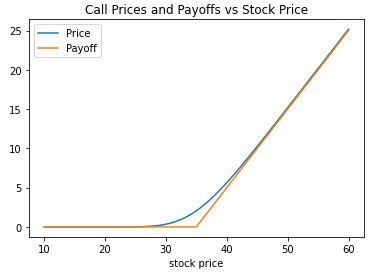
    </div>
</div>

#### Q.No.4.1 Price the value of the call option with 35 strike, 6 months to termination, at 0.2 volatility and 1% risk-free rate, when stock price ranges from 10 to 60 (use $0.50 increments).
#### Answer:

In [57]:
# Define parameters
strike = 35               # Strike price of the option
term = 0.5                # Time to expiration in years (6 months)
risk_free_rate = 0.01     # Annual risk-free interest rate
volatility = 0.2          # Annual volatility
stock_prices = np.arange(10, 60.5, 0.5)  # Stock price range from $10 to $60 in $0.50 increments

# Black-Scholes call option pricing formula
def black_scholes_call_price(stock_price, strike, term, risk_free_rate, volatility):
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (risk_free_rate + 0.5 * volatility ** 2) * term)
    d2 = d1 - volatility * np.sqrt(term)
    call_price = stock_price * norm.cdf(d1) - strike * np.exp(-risk_free_rate * term) * norm.cdf(d2)
    return call_price

# Calculate call option prices using Black-Scholes formula
call_prices = [black_scholes_call_price(stock_price, strike, term, risk_free_rate, volatility) for stock_price in stock_prices]

# Display only the last 10 results to check the result
print("    Stock Price |  Call Price   ")
print("-------------------------------------")
for stock_price, payoffs in zip(stock_prices[-10:], call_prices[-10:]):
    print(f"{stock_price:16.2f}|{payoffs :10.2f} ")


    Stock Price |  Call Price   
-------------------------------------
           55.50|     20.68 
           56.00|     21.18 
           56.50|     21.68 
           57.00|     22.17 
           57.50|     22.67 
           58.00|     23.17 
           58.50|     23.67 
           59.00|     24.17 
           59.50|     24.67 
           60.00|     25.17 


#### Q.No.4.2 Also calculate the option's payoff assuming the same range of stock price at termination.
#### Answer:

In [60]:
call_payoffs = [max(S - strike, 0) for S in stock_prices]

# Display only the last 10 results to check the result
print("    Stock Price |      Payoffs   ")
print("-------------------------------------")
for stock_price, payoffs in zip(stock_prices[-10:], call_payoffs[-10:]):
    print(f"{stock_price:16.2f}|{payoffs:10.2f} ")

    Stock Price |      Payoffs   
-------------------------------------
           55.50|     20.50 
           56.00|     21.00 
           56.50|     21.50 
           57.00|     22.00 
           57.50|     22.50 
           58.00|     23.00 
           58.50|     23.50 
           59.00|     24.00 
           59.50|     24.50 
           60.00|     25.00 


#### Q.No.4.3 Plot the ranges of call option prices and payoffs in a single line plot. Provide a legend, x-axis label, and title for the plot.
#### Answer

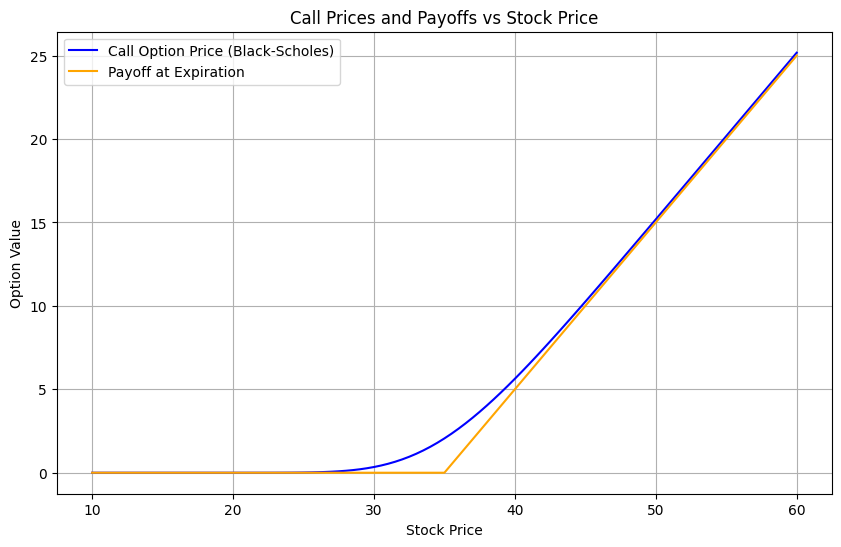

In [63]:
# Plot call prices and payoffs
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices, label='Call Option Price (Black-Scholes)', color='blue')
plt.plot(stock_prices, call_payoffs, label='Payoff at Expiration', color='orange')
plt.title("Call Prices and Payoffs vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Option Value")
plt.legend()
plt.grid(True)
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Recall that given a continuous annual dividend rate $q$:
    <br><br>
    $$Call = S_0e^{-qT}N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$Put = Ke^{-rT}N(-d_2) - S_0e^{-qT}N(-d_1)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r - q + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <ul>
        <li>Add an additional input parameter <code>dividend</code>, to the function <code>black_sholes_formula</code>, representing the continuous rate of dividend paid to shareholders by the stock, with a default value to equal to 0. Modify the Black-Scholes pricing formula to account for the dividend rate.</li>
        <li>Calculate the price of a call option where the stock price is \$30, strike is \$35, term is 6 months, volatility is 20%, that also pays a 2.5% annual dividend, using a risk-free rate of 1%. Your answer should be approximately \$0.2856.</li>
        <li>How does adding a dividend rate influence the price of a call option and why?</li>
    </ul>
    </div>
</div>

#### Q.No.5.1 Add an additional input parameter dividend, to the function black_sholes_formula, representing the continuous rate of dividend paid to shareholders by the stock, with a default value to equal to 0. Modify the Black-Scholes pricing formula to account for the dividend rate.
#### Answer

In [67]:
K = 35               # Strike price of the option
T = 0.5              # Time to expiration in years (6 months)
r = 0.01             # Annual risk-free interest rate
volatility = 0.2     # Annual volatility
dividend_rate = 0

stock_prices = np.arange(10, 60.5, 0.5)  # Stock price range from $10 to $60 in $0.50 increments

# Function to calculate option prices with the dividend parameter
def black_scholes_option_price_without_dividend_influence(S, K, T, r, volatility, dividend_rate, option):
    # Calculate d1 and d2
    d1 = (1 / (volatility * np.sqrt(T))) * (np.log(S / K) + (r - dividend_rate + 0.5 * volatility ** 2) * T)
    d2 = d1 - volatility * np.sqrt(T)

    if option == "Call":
        return S * np.exp(-dividend_rate * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)  # Call option price
    
    elif option == "Put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-dividend_rate * T) * norm.cdf(-d1)  # Put option price
    
    else:
        print("Error: Option type must be 'Call' or 'Put'")
        return None

# Calculate call and put option prices
call_prices = [black_scholes_option_price_without_dividend_influence(S, K, T, r, volatility, dividend_rate, "Call") for S in stock_prices]
put_prices = [black_scholes_option_price_without_dividend_influence(S, K, T, r, volatility, dividend_rate, "Put") for S in stock_prices]

# To check the result display the last 10 results for both call and put prices
print("    Stock Price | Call Price   | Put Price    ")
print("---------------------------------------------")
for S, call_price, put_price in zip(stock_prices[-10:], call_prices[-10:], put_prices[-10:]):
    print(f"       {S:.2f}   |{call_price:.2f} |{put_price:.2f}   ")


    Stock Price | Call Price   | Put Price    
---------------------------------------------
       55.50   |20.68 |0.00   
       56.00   |21.18 |0.00   
       56.50   |21.68 |0.00   
       57.00   |22.17 |0.00   
       57.50   |22.67 |0.00   
       58.00   |23.17 |0.00   
       58.50   |23.67 |0.00   
       59.00   |24.17 |0.00   
       59.50   |24.67 |0.00   
       60.00   |25.17 |0.00   


#### Q.No.5.2 Calculate the price of a call option where the stock price is 30, strike is 35, term is 6 months, volatility is 20%, that also pays a 2.5% annual dividend, using a risk-free rate of 1%. Your answer should be approximately 0.2856.
#### Answer:

In [70]:

# Define parameters
strike = 35               # Strike price of the option
term = 0.5                # Time to expiration in years (6 months)
risk_free_rate = 0.01     # Annual risk-free interest rate
volatility = 0.2          # Annual volatility
dividend_rate = 0.025
stock_price = 30          # Single stock price

# Black-Scholes call option pricing formula with dividend
def black_scholes_call_price_with_dividend_influence(S, K, T, r, sigma, dividend_rate):
    d1 = (1 / (sigma * np.sqrt(T))) * (np.log(S / K) + (r - dividend_rate + 0.5 * sigma ** 2) * T)
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-dividend_rate * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Calculate the call option price for the single stock price
call_price = black_scholes_call_price_with_dividend_influence(stock_price, strike, term, risk_free_rate, volatility, dividend_rate)

# Display the result
print("Stock Price | Option Price")
print("-------------------------")
print(f"{stock_price:10} | {call_price:.4f}")


Stock Price | Option Price
-------------------------
        30 | 0.2856


#### 5.3 How does adding a dividend rate influence the price of a call option and why?
#### Answer: 


In [73]:
# Calculate call option price without dividend influence (dividend_rate = 0)
call_price_without_dividend = black_scholes_option_price_without_dividend_influence(30, K, T, r, volatility,0, "Call")

# Calculate call option price with dividend influence (dividend_rate = 0.025)
dividend_rate = 0.025
call_price_with_dividend = black_scholes_call_price_with_dividend_influence(30, K, T, r, volatility, 0.025)

# Calculate the influence of the dividend
dividend_influence = call_price_without_dividend - call_price_with_dividend

# Display the results
print("Stock Price | Call Price (No Dividend) | Call Price (With Dividend) | Dividend Influence")
print("--------------------------------------------------------------------------------------")
print(f"{30:10} | ${call_price_without_dividend:.4f}            | ${call_price_with_dividend:.4f}             | ${dividend_influence:.4f}")


Stock Price | Call Price (No Dividend) | Call Price (With Dividend) | Dividend Influence
--------------------------------------------------------------------------------------
        30 | $0.3423            | $0.2856             | $0.0567


**Decision:** 
- Dividends affect call option pricing by lowering the expected future stock price. Specifically, when a dividend is paid, the stock price typically drops by the amount of the dividend on the ex-dividend date. This reduction in the stock price leads to a decrease in the intrinsic value of the call option.

- In our calculations, the call price without dividends is 0.3423, while it decreases to 0.2856 with a 0.025 dividend rate, resulting in a difference of $0.0567. This reduction in the call price highlights the impact of dividends on option value.

 - The reason for this effect is that lower stock prices diminish the potential payoff for the call option holder. When the stock is expected to decrease in value due to dividend payouts, the likelihood of the option being in-the-money at expiration is also reduced, leading to a lower valuation of the call option.